## Initialization

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor,     GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

crop_filepath = "./data/new1.csv"
data = pd.read_csv(crop_filepath)

# Visualization

C:\Users\victo\AppData\Local\Temp\ipykernel_12112\2586060177.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: title={'center': 'Correlation between features'}>

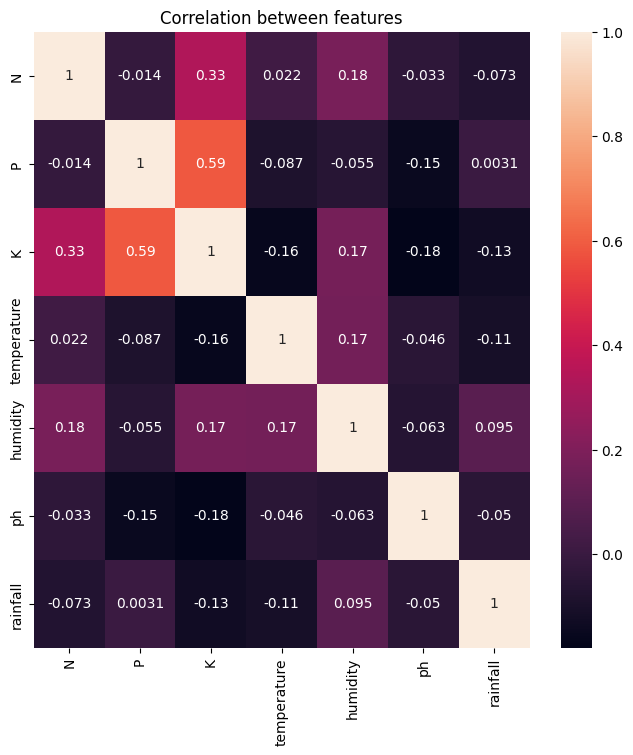

In [3]:
plt.figure(figsize=(8,8))
plt.title("Correlation between features")
corr = data.corr()
sns.heatmap(corr, annot=True)

# Evaluation

In [4]:
encoder = LabelEncoder()
data.label = encoder.fit_transform(data.label)
features = data.drop("label", axis=1)
target = data.label
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)


## Gradient Boosting

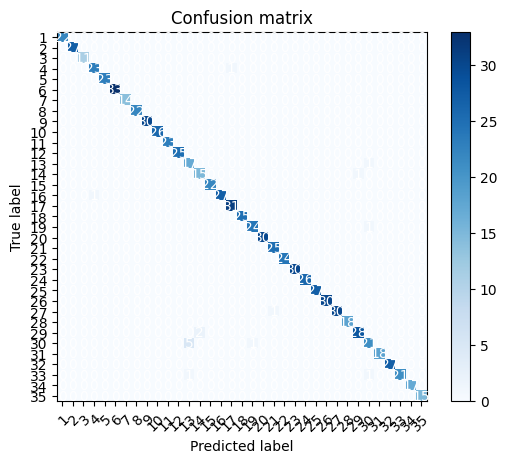

In [5]:
gbr = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
gbr_pred= gbr.predict(X_test)

cm = metrics.confusion_matrix(y_test, gbr_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels and axis labels
ax.set_xticks(np.arange(cm.shape[1]))
ax.set_yticks(np.arange(cm.shape[0]))
ax.set_xticklabels(np.arange(1, cm.shape[1]+1))
ax.set_yticklabels(np.arange(1, cm.shape[0]+1))
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Confusion matrix")

plt.show()

## Random Forest

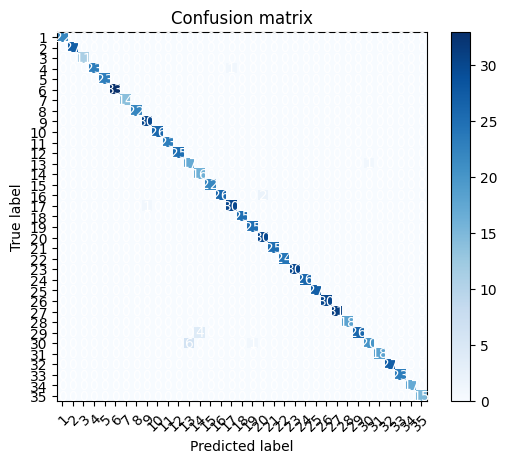

In [6]:
rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=0).fit(X_train, y_train)
y_pred= rf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels and axis labels
ax.set_xticks(np.arange(cm.shape[1]))
ax.set_yticks(np.arange(cm.shape[0]))
ax.set_xticklabels(np.arange(1, cm.shape[1]+1))
ax.set_yticklabels(np.arange(1, cm.shape[0]+1))
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Confusion matrix")

plt.show()

## Decision Tree

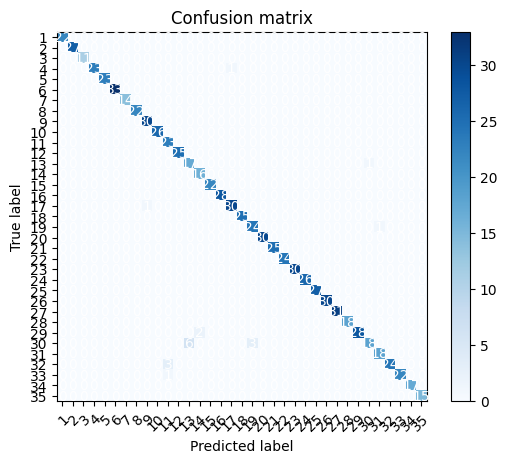

In [7]:
tree = DecisionTreeClassifier(max_depth=15,random_state=0).fit(X_train, y_train)
tree_pred= tree.predict(X_test)

cm = metrics.confusion_matrix(y_test, tree_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels and axis labels
ax.set_xticks(np.arange(cm.shape[1]))
ax.set_yticks(np.arange(cm.shape[0]))
ax.set_xticklabels(np.arange(1, cm.shape[1]+1))
ax.set_yticklabels(np.arange(1, cm.shape[0]+1))
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Confusion matrix")

plt.show()

## SVM

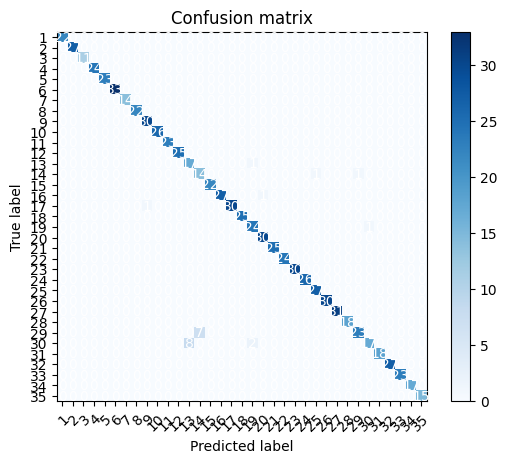

In [8]:
svm = SVC(C=100, gamma=0.001).fit(X_train, y_train)
svm_pred= svm.predict(X_test)

cm = metrics.confusion_matrix(y_test, svm_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels and axis labels
ax.set_xticks(np.arange(cm.shape[1]))
ax.set_yticks(np.arange(cm.shape[0]))
ax.set_xticklabels(np.arange(1, cm.shape[1]+1))
ax.set_yticklabels(np.arange(1, cm.shape[0]+1))
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Confusion matrix")

plt.show()

## MLP

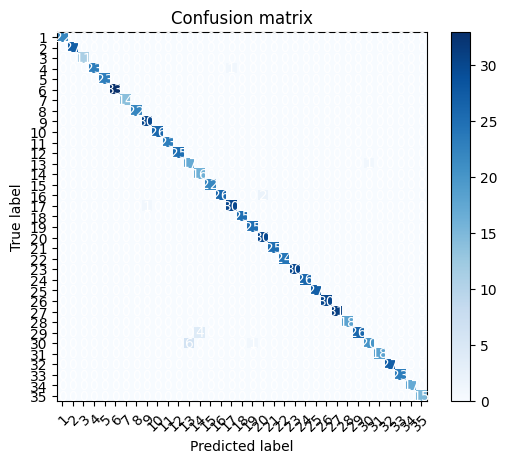

In [9]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0, max_iter=10000, alpha=0.01,hidden_layer_sizes=[100,50])
mlp.fit(X_train_scaled, y_train)

mlp_pred= mlp.predict(X_test_scaled)

cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels and axis labels
ax.set_xticks(np.arange(cm.shape[1]))
ax.set_yticks(np.arange(cm.shape[0]))
ax.set_xticklabels(np.arange(1, cm.shape[1]+1))
ax.set_yticklabels(np.arange(1, cm.shape[0]+1))
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Confusion matrix")

plt.show()

## Accuracy

In [20]:
Accuracyrf = metrics.accuracy_score(y_test, y_pred)
Accuracygbr = metrics.accuracy_score(y_test, gbr_pred)
Accuracytree = metrics.accuracy_score(y_test, tree_pred)
Accuracysvm = metrics.accuracy_score(y_test, svm_pred)
Accuracymlp = metrics.accuracy_score(y_test, mlp_pred)

## Precision

In [11]:
Precision = metrics.precision_score(y_test, y_pred, average=None)
avgPrecrf = np.mean(Precision)
Precision = metrics.precision_score(y_test, gbr_pred, average=None)
avgPrecgbr = np.mean(Precision)
Precision = metrics.precision_score(y_test, tree_pred, average=None)
avgPrectree = np.mean(Precision)
Precision = metrics.precision_score(y_test, svm_pred, average=None)
avgPrecsvm = np.mean(Precision)
Precision = metrics.precision_score(y_test, mlp_pred, average=None)
avgPrecmlp = np.mean(Precision)


## Specificity

In [12]:
Specificity = metrics.recall_score(y_test, y_pred, average=None)
avgSpecrf = np.mean(Specificity)

Specificity = metrics.recall_score(y_test, gbr_pred, average=None)
avgSpecgbr = np.mean(Specificity)

Specificity = metrics.recall_score(y_test, tree_pred, average=None)
avgSpectree = np.mean(Specificity)

Specificity = metrics.recall_score(y_test, svm_pred, average=None)
avgSpecsvm = np.mean(Specificity)

Specificity = metrics.recall_score(y_test, mlp_pred, average=None)
avgSpecmlp = np.mean(Specificity)


## F1 score

In [13]:
F1_scorerf = metrics.f1_score(y_test, y_pred, average='macro')
F1_scoregbr = metrics.f1_score(y_test, gbr_pred, average='macro')
F1_scoretree = metrics.f1_score(y_test, tree_pred, average='macro')
F1_scoresvm = metrics.f1_score(y_test, svm_pred, average='macro')
F1_scoremlp = metrics.f1_score(y_test, mlp_pred, average='macro')


## F1 weighted

In [14]:
F1_scoreWrf = metrics.f1_score(y_test, y_pred, average='weighted')
F1_scoreWgbr = metrics.f1_score(y_test, gbr_pred, average='weighted')
F1_scoreWtree = metrics.f1_score(y_test, tree_pred, average='weighted')
F1_scoreWsvm = metrics.f1_score(y_test, svm_pred, average='weighted')
F1_scoreWmlp = metrics.f1_score(y_test, mlp_pred, average='weighted')


## Recall

In [15]:
recallrf = metrics.recall_score(y_test, y_pred, average='macro')
recallgbr = metrics.recall_score(y_test, gbr_pred, average='macro')
recalltree = metrics.recall_score(y_test, tree_pred, average='macro')
recallsvm = metrics.recall_score(y_test, svm_pred, average='macro')
recallmlp = metrics.recall_score(y_test, mlp_pred, average='macro')

## Breakdown Random Forest

In [25]:
recallrf = metrics.recall_score(y_test, y_pred, average='macro')
recallrf

0.9830428156925852

In [ ]:
Precision = metrics.precision_score(y_test, y_pred, average=None)
avgPrecrf = np.mean(Precision)
avgPrecrf

0.9807438205619933

In [ ]:
F1_scoreWrf = metrics.f1_score(y_test, y_pred, average='weighted')
F1_scoreWrf

0.9810305785529592

In [ ]:
F1_scorerf = metrics.f1_score(y_test, y_pred, average='macro')
F1_scorerf

0.9806065970257828

In [ ]:
Specificity = metrics.recall_score(y_test, y_pred, average=None)
avgSpecrf = np.mean(Specificity)
avgSpecrf

0.9830428156925852

In [ ]:
Accuracyrf = metrics.accuracy_score(y_test, y_pred)
Accuracyrf

0.9810201660735468

## Display Results

In [16]:
predictions_acc = { "Model": ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVC', 'MLP'],
"Accuracy": [Accuracytree, Accuracyrf, Accuracygbr, Accuracysvm, Accuracymlp], "Precision": [avgPrectree, avgPrecrf, avgPrecgbr, avgPrecsvm, avgPrecmlp], 
"Specificity": [avgSpectree, avgSpecrf, avgSpecgbr, avgSpecsvm, avgSpecmlp], "F1 score": [F1_scoretree, F1_scorerf, F1_scoregbr, F1_scoresvm, F1_scoremlp],
"F1 score weighted": [F1_scoreWtree, F1_scoreWrf, F1_scoreWgbr, F1_scoreWsvm, F1_scoreWmlp], "Recall": [recalltree, recallrf, recallgbr, recallsvm, recallmlp]}

In [17]:
model_acc = pd.DataFrame(predictions_acc, columns=["Model", "Accuracy", "Precision", "Specificity", "F1 score", "F1 score weighted", "Recall"])
model_acc

,Model,Accuracy,Precision,Specificity,F1 score,F1 score weighted,Recall
0,Decision Tree,0.977461,0.977114,0.979312,0.976676,0.977141,0.979312
1,Random Forest,0.981020,0.980744,0.983043,0.980607,0.981031,0.983043
2,Gradient Boosting,0.981020,0.980303,0.981613,0.980396,0.981183,0.981613
3,SVC,0.972716,0.972517,0.974508,0.971211,0.972576,0.974508
4,MLP,0.975089,0.973220,0.975577,0.973384,0.975078,0.975577


## Display RFC Evaluation

In [26]:
predictions_acc_rf = { "Model": ['Random Forest'],
"Accuracy": [Accuracyrf], "Precision": [avgPrecrf], 
"Specificity": [avgSpecrf], "F1 score": [ F1_scorerf,],
"F1 score weighted": [F1_scoreWrf,], "Recall": [recallrf]}

In [27]:
model_acc = pd.DataFrame(predictions_acc_rf, columns=["Model", "Accuracy", "Precision", "Specificity", "F1 score", "F1 score weighted", "Recall"])
model_acc

,Model,Accuracy,Precision,Specificity,F1 score,F1 score weighted,Recall
0,Random Forest,0.98102,0.980744,0.983043,0.980607,0.981031,0.983043
